# Dimension Reduction in MHD Power Generation Models: Dimensional Analysis and Active Subspaces

__Andrew Glaws__, Colorado School of Mines, <aglaws@mines.edu>

__Paul Constantine__, Colorado School of Mines, <pconstan@mines.edu>

__John Shadid__, Sandia National Laboratories

__Timothy Wildey__, Sandia National Laboratories

__Ryan Howard__, Colorado School of Mines, <ryhoward@mines.edu>

<br>

In this notebook, we'll be summarizing the active subspaces and dimensional analysis methodologies and results on two MHD power generation models, presented in [1].

### Introduction

Magnetohydrodynamics (MHD) is the study of electrically conducting fluids, and one application of this area of physics is increasing the efficiency of power generation. To reasonably incorporate theory into practical generator design, it is important to know how model predictions will change when input parameters change. Some sensitivity analysis methods reduce the dimension of the input space by identifying important combinations of input parameters; less important combinations could be ignored with negligible loss of accuracy, and this can enable parameter studies that would otherwise be infeasible due to the expense of simulations. Here, we'll discuss the more traditional dimension reduction technique of _dimensional analysis_, an emerging method called _active subspaces_, their connection, and their results on several MHD models.

### Dimension Reduction

In this section, we consider dimension reduction on models that return a scalar quantity of interest, $y$, that depends on the model's $m$ input parameters, $\mathbf x$: $y = f(\mathbf x)$. We discuss dimensional analysis and active subspaces in turn.

##### Dimensional Analysis

The inputs and outputs of models are generally quantities that have physical units, most of which are derived from $k\leq m$ base units, denoted $L_1, \dots, L_k$ (e.g. a subset of the seven SI units). The _unit function_ returns the units of its argument and is denoted with square brackets, e.g. if $y$ is a velocity, then $[y]$ = m$\cdot$s$^{-1}$. We can write the units of the inputs, $\mathbf x = [x_1, x_2, \dots, x_m]^T$ and output, $y$, as

$$
[x_j] = \prod_{i=1}^k L_i^{d_{i, j}},\ [y] = \prod_{i=1}^k L_i^{u_i},
$$

and we define the matrix $\mathbf D$ and vector $\mathbf u$ as

$$
\mathbf D = \left[\begin{matrix}d_{1,1} & \cdots & d_{1, m}\\ \vdots & \ddots & \vdots \\ d_{k,1} & \cdots & d_{k, m}\end{matrix}\right],\ \mathbf u = \left[\begin{matrix}u_1\\\vdots\\u_k\end{matrix}\right].
$$

Now, let $\mathbf v$ satisfy $\mathbf D\mathbf v = \mathbf u$ and let $\mathbf U$ be a basis for $\mathbf D$'s null space: $\mathbf D \mathbf U = \mathbf 0$. We can construct a unitless quantity of interest, $\Pi$, as 

$$
\Pi = y\prod_{i=1}^mx_i^{-v_i},
$$

where $v_i$ is the $i^{th}$ component of $\mathbf v$, and unitless parameters, $\Pi_j$ as

$$
\Pi_j = \prod_{i=1}^mx_i^{u_{i,j}},\ j=1,\dots,n\ (n\equiv m-k).
$$

The Buckingham Pi Theorem states that $\Pi = \tilde f(\mathbf\Pi),\ \mathbf\Pi = [\Pi_1,\dots,\Pi_n]^T$, i.e., that our law, $y=f(\mathbf x)$, can be characterized in unitless form with $n < m$ parameters.

##### Active Subspaces

The active subspace method is based on the matrix

$$
\mathbf C = \int\nabla f(\mathbf x)\nabla f(\mathbf x)^T\gamma(\mathbf x)\ d\mathbf x = \mathbf W\Lambda\mathbf W^T,
$$

where $\nabla f(\mathbf x)$ is the gradient of $f$ with respect to $\mathbf x$, $\gamma(\mathbf x)$ is a probability density on $\mathbf x$, and $\mathbf W\Lambda\mathbf W^T$ is the eigendecomposition of $\mathbf C$ (with the eigenvalues in descending order). If $\lambda_n > \lambda_{n+1}$ for some $n < m$, we can partition the decomposition as

$$
\Lambda = \left[\begin{matrix}\Lambda_1 & \\ & \Lambda_2 \end{matrix}\right],\ \mathbf W = \left[\begin{matrix}\mathbf W_1 & \mathbf W_2\end{matrix}\right],
$$

where $\Lambda_1$ contains the first $n$ eigenvalues and $\mathbf W_1$ the corresponding vectors. The active subspace is the span of $\mathbf W_1$'s columns and the active variables are $\mathbf y = \mathbf W_1^T\mathbf x$. The inactive subspace is the span of $\mathbf W_2$'s columns and the inactive variables are $\mathbf z = \mathbf W_2^T\mathbf x$. The eigenvalues quantify how much $f$ changes, on average, in these two subspaces:

$$
\lambda_1 + \cdots + \lambda_n = \int\nabla_{\mathbf y} f(\mathbf x)\nabla_{\mathbf y} f(\mathbf x)^T\gamma(\mathbf x)\ d\mathbf x,\\
\lambda_{n+1} + \cdots + \lambda_m = \int\nabla_{\mathbf z} f(\mathbf x)\nabla_{\mathbf z} f(\mathbf x)^T\gamma(\mathbf x)\ d\mathbf x,
$$

where $\nabla_{\mathbf y}$ and $\nabla_{\mathbf x}$ are gradients with respect to the active and inactive variables. If $\lambda_{n+1},\dots,\lambda_m$ are small compared to the first $n$ values, we can approximate $f(\mathbf x)\approx g(\mathbf W_1^T\mathbf x),\ g:R^n\rightarrow R$. $\mathbf C$ must be approximated with a numerical integration rule, simple Monte Carlo for example: draw $\{\mathbf x_j\}_{j=1}^M$ from $\gamma$, compute gradients at each point, and approximate $\mathbf C\approx\hat{\mathbf C} = \frac 1 M\sum_{j=1}^M\nabla f(\mathbf x_j)\nabla f(\mathbf x_j)^T = \hat{\mathbf W}\hat\Lambda\hat{\mathbf W}^T$.

##### Connecting Dimensional Analysis With Active Subspaces

We can uncover a connection between dimensional analysis and active subspaces by rewriting the unitless form of our law:

$$
\begin{align}
y\prod_{i=1}^mx_i^{-v_i} &= \tilde f\left(\prod_{i=1}^mx_i^{u_{i,1}},\dots,\prod_{i=1}^mx_i^{u_{i,n}}\right) \\ &= \tilde f\left(\exp\left(\log\left(\prod_{i=1}^mx_i^{u_{i,1}}\right)\right),\dots,\exp\left(\log\left(\prod_{i=1}^mx_i^{u_{i,n}}\right)\right)\right) \\ &= \tilde f\left(\exp\left(\sum_{i=1}^mu_{i,1}\log(x_i)\right),\dots,\exp\left(\sum_{i=1}^mu_{i,n}\log(x_i)\right)\right) \\ &= \tilde f\left(\exp(\mathbf u_1^T\log(\mathbf x)),\dots,\exp(\mathbf u_n^T\log(\mathbf x))\right) \\\Rightarrow y &= \exp(\mathbf v^T\log(\mathbf x))\cdot \tilde f\left(\exp(\mathbf u_1^T\log(\mathbf x)),\dots,\exp(\mathbf u_n^T\log(\mathbf x))\right) \\ &= \tilde g(\mathbf A^T\log(\mathbf x)),\ \mathbf A = \left[\begin{matrix}\mathbf v & \mathbf u_1 & \cdots & \mathbf u_n\end{matrix}\right]\in R^{m\times(n+1)}.
\end{align}
$$

Let $\tilde{\mathbf x} = \log(\mathbf x)$; by the chain rule, $\nabla_{\tilde{\mathbf x}}\tilde g(\mathbf A^T\tilde{\mathbf x}) = \mathbf A \nabla\tilde g(\mathbf A^T\tilde{\mathbf x})$. Let $\tilde\gamma(\tilde{\mathbf x})$ be a pdf on $\tilde{\mathbf x}$; then 

$$
\int\nabla_{\tilde{\mathbf x}}\tilde g(\mathbf A^T\tilde{\mathbf x})\nabla_{\tilde{\mathbf x}}\tilde g(\mathbf A^T\tilde{\mathbf x})^T\tilde\gamma(\tilde{\mathbf x})\ d\tilde{\mathbf x} = \mathbf A\left(\int\nabla\tilde g(\mathbf A^T\tilde{\mathbf x})\nabla\tilde g(\mathbf A^T\tilde{\mathbf x})^T\tilde\gamma(\tilde{\mathbf x})\ d\tilde{\mathbf x}\right)\mathbf A^T.
$$

This shows that the dimension of the physical law's active subspace (in terms of its log inputs) has dimension of at most $n+1$ and is a subspace of $\mathbf A$'s column space.

### Dimensional analysis for MHD

With some simplifying assumptions, the equations of MHD can be written as

$$
\rho\mathbf u\cdot\nabla\mathbf u = -\nabla(p_0+p)+\mu\nabla^2\mathbf u-\frac 1 \eta\mathbf B\times(\mathbf u\times \mathbf B),
$$

where $\mathbf u$ is the fluid velocity, $\mathbf B$ is the magnetic field, and $p_0$ is the applied pressure. The necessary base units are length ($L$), time ($T$), mass ($M$), and electrical current ($C$). The model's parameters and units are summarized in the table below.

Parameter | Symbol | Units
:---------|:------:|:----:
Length | $l$ | $L$
Velocity | $v$ | $\frac L T$
Fluid Viscosity | $\mu$ | $\frac{M}{LT}$
Fluid Density | $\rho$ | $\frac{M}{L^3}$
Pressure | $p$ | $\frac{M}{LT^2}$
Fluid Magnetic Resistivity | $\eta$ | $\frac{ML^3}{T^3C^2}$
Magnetic Field | $B$ | $\frac{M}{T^2C}$

The Buckingham Pi Theorem says the system depends on 3 unitless parameters; following the machinery presented above, these can be shown to be: $\Pi_1 = \frac{\rho v l}{\mu},\ \Pi_2 = \frac{Bl}{\eta^{1/2}\mu^{1/2}},\ \Pi_3 = \frac{p}{\rho v^2}$. A particular quantity of interest will depend on at most 4 linear combinations of log-parameters.

### References:

[1] A. Glaws, P.G. Constantine, J. Shadid, and T.M. Wildey. _Dimension reduction in MHD power generation models: dimensional analysis and active subspaces_.

[[2]][R2] P.G. Constantine, E. Dow, and Q. Wang. _Active subspaces in theory and practice: applications to kriging surfaces_. SIAM J. Sci. Comput., 36(4), A1500–A1524

[R2]: http://dx.doi.org/10.1137/130916138

<br>

### MHD Active Subspaces

We'll now look at some examples of MHD models and how we apply active subspaces to them. The computations rely on the [Python Active-subspaces Utility Library](https://github.com/paulcon/active_subspaces).

##### The Hartmann Problem

The Hartmann problem models laminar flow between parallel plates and admits closed-form analytical solutions in terms of its input parameters. We examine two quantities of interest: average flow velocity, $u_{avg}$, and the induced magnetic field, $B_{ind}$, whose solutions are

$$
u_{avg} = -\frac{\partial p_0}{\partial x}\frac{\eta}{B_0^2}\left(1 - \frac{B_0l}{\sqrt{\eta\mu}}\coth\left(\frac{B_0l}{\sqrt{\eta\mu}}\right)\right), \\
B_{ind} = \frac{\partial p_0}{\partial x}\frac{l\mu_0}{2B_0}\left(1 - 2\frac{\sqrt{\eta\mu}}{B_0l}\tanh\left(\frac{B_0l}{2\sqrt{\eta\mu}}\right)\right).
$$

This has 5 input parameters ($\mathbf x = \left[\begin{matrix}\log(\mu) & \log(\rho) & \log(\frac{\partial p_0}{\partial x}) & \log(\eta) & \log(B_0)\end{matrix}\right]^T$, $l$ is fixed and $\mu_0$ is a physical constant). We choose $\gamma$ to be a uniform density, with ranges summarized below.

Variable | $\ $ Notation $\ $ | Range $\ \ \ \ \ $
:--------|:--------:|:------------
Fluid Viscosity | $\log(\mu)$ | [log(.05), log(.2)]
Fluid Density | $\log(\rho)$ | [log(1), log(5)]
Applied Pressure Gradient | $\log(\frac{\partial p_0}{\partial x})$ | [log(.5), log(3)]
Resistivity | $\log(\eta)$ | [log(.5), log(3)]
Applied Magnetic Field | $\log(B_0)$ | [log(.1), log(1)]

Following is code for computing the active subspaces for this model's outputs.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pn
import active_subspaces as ac

Gradients are computed analytically from the formulae above, and we set $l$ and $\mu_0$ to each be 1.0 (these functions are contained in the 'gradients.py' file).

In [2]:
from gradients import *

#return gradient times its transpose times gamma
def subspace_integrand(df):
    df = df.reshape((5, 1))
    return df.dot(df.T)*2**-5

#labels for plots
in_labels = [r'$\log(\mu)$', r'$\log(\rho)$', r'$\log(\frac{\partial p_0}{\partial x})$',
            r'$\log(\eta)$', r'$\log(B_0)$']
out_labels = [r'$u_{avg}$', r'$B_{ind}$']

We approximate the integral defining $\mathbf C$ with a Gauss-Legendre rule with 11 points in each of the 5 dimensions (totaling 161051 points). We'll first examine $u_{avg}$ as our quantity of interest.

In [3]:
#gauss-legendre quadrature points/weights
xx, w = ac.utils.quadrature.gauss_legendre([11, 11, 11, 11, 11])

#un-normalized log-inputs
x = lb + (ub - lb)/2.*(xx + 1)

#output and gradient values for u_avg
u = uavg(x)
du = uavg_grad(x)

integrands = []
for i in range(du.shape[0]):
    integrands.append(subspace_integrand(du[i])*w[i])

integrands = np.array(integrands)
C = integrands.sum(axis=0)

Now we compute the eigendecomposition of $\mathbf C$ and plot the eigenvalues, first 2 eigenvectors, and 1- and 2-dimensional summary plots (plots of the active variable(s) vs data values; tight trends indicate active subspaces).

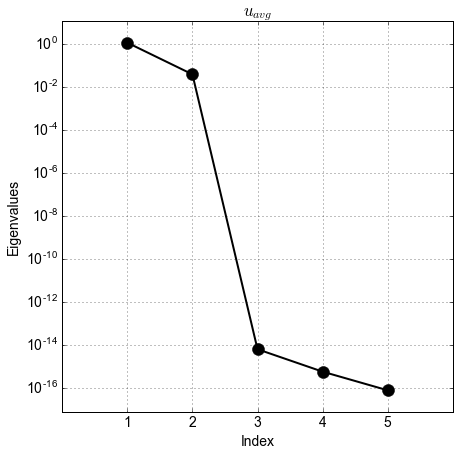

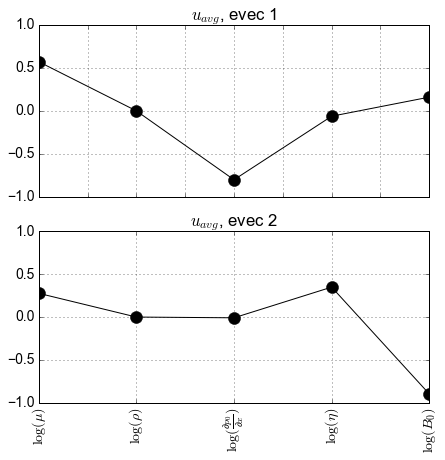

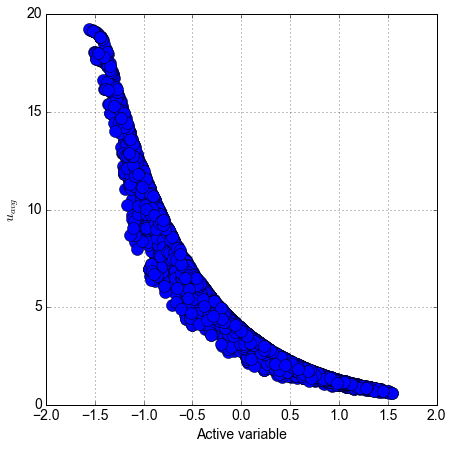

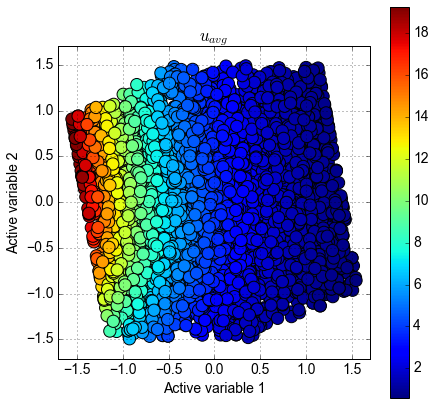

In [4]:
#sorted eigendecomposition of C
eu, Wu = ac.subspaces.sorted_eigh(C)

#plot eigenvalues, eigenvectors
ac.utils.plotters.eigenvalues(eu, out_label=out_labels[0])
W1u = Wu[:,:2]
ac.utils.plotters.eigenvectors(W1u, in_labels=in_labels, out_label=out_labels[0])

#create summary plot with 5000 random points
mask = np.random.choice(range(xx.shape[0]), 5000, False)
ac.utils.plotters.sufficient_summary(xx[mask].dot(W1u), u[mask,None], out_label=out_labels[0])

The second eigenvalue is  at least an order of magnitude smaller than the first, so we would expect the presence of a 1-dimensional subspace, and the eigenvalues past the second are nearly zero, indicating that a 2-dimensional subspace should completely characterize our output. These expectations are confirmed in the summary plots; the 1-dimensional plot has a tight (but imperfect) trend and the 2-dimensional plot shows a perfect trend. The eigenvectors provide a measure of global sensitivity; higher-magnitude components indicate more sensitivity to the corresponding parameter. For example, neither vector places any weight on $\log(\rho)$, which we would expect since $u_{avg}$ is independent of $\rho$.

Now we repeat the process for $B_{ind}$.

In [5]:
#output and gradient values
B = Bind(x)
dB = Bind_grad(x)

integrands = []
for i in range(dB.shape[0]):
    integrands.append(subspace_integrand(dB[i])*w[i])

integrands = np.array(integrands)
C = integrands.sum(axis=0)

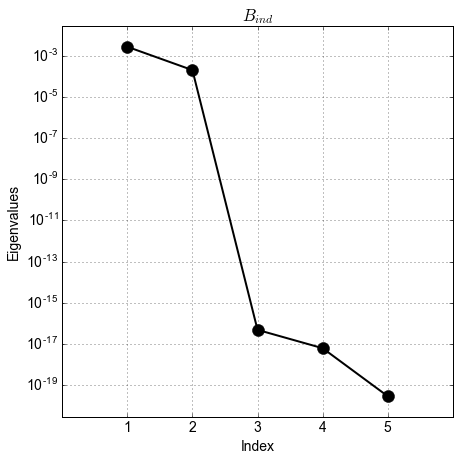

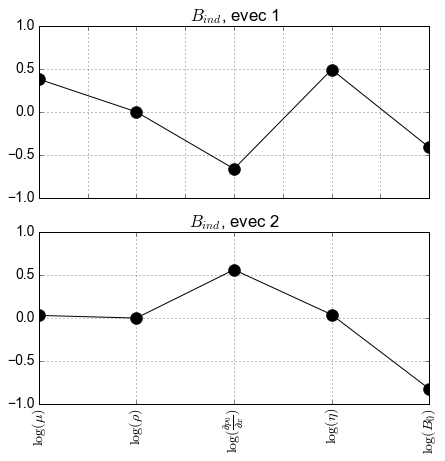

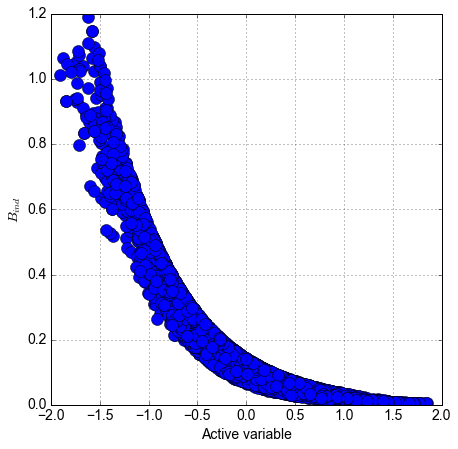

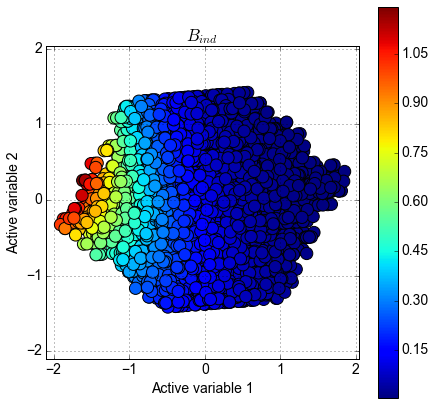

In [6]:
#sorted eigendecomposition of C
eB, WB = ac.subspaces.sorted_eigh(C)

#plot eigenvalues, eigenvectors
ac.utils.plotters.eigenvalues(eB, out_label=out_labels[1])
W1B = WB[:,:2]
ac.utils.plotters.eigenvectors(W1B, in_labels=in_labels, out_label=out_labels[1])

#create summary plot with 5000 random points
mask = np.random.choice(range(xx.shape[0]), 5000, False)
ac.utils.plotters.sufficient_summary(xx[mask].dot(W1B), B[mask,None], out_label=out_labels[1])

We can make similar observations for $B_{ind}$: a tight 1-dimensional plot and a perfect 2-dimensional plot, as we would expect from the similar eigenvalue decay compared to $u_{avg}$.

The analysis above indicated that the quantities of interest should depend on 3 unitless parameters; we might wonder why our active subspace is only 2-dimensional. To see why this happens, we rewrite the quantities of interest in terms of the unitless Reynolds and Hartmann numbers ($R$ and $H$) and a unitless pressure gradient:

$$
u_{avg}^* = -\frac{\partial p_0^*}{\partial x^*}\frac{R}{H^2}(1 - H\coth(H)),\\
B_{ind}^* = \frac{\partial p_0^*}{\partial x^*}\frac R H\mu_0^*(1 - \frac{2}{H}\tanh(\frac H 2)).
$$

The Reynolds number and dimensionless pressure gradient only appear as a product, which we could define as a new unitless quantity. This explains why our active subspace has only 2 dimensions.

##### MHD Generator Problem

We now consider a model that describes 3D duct flow in an idealized MHD generator. The variable input parameters are the same as those in the Hartmann problem (with uniform densities), but they have different ranges, summarized below.

Variable | $\ $ Notation $\ $ | Range $\ \ \ \ \ $
:--------|:--------:|:------------
Fluid Viscosity | $\log(\mu)$ | [log(.001), log(.01)]
Fluid Density | $\log(\rho)$ | [log(.1), log(10)]
Applied Pressure Gradient | $\log(\frac{\partial p_0}{\partial x})$ | [log(.1), log(.5)]
Resistivity | $\log(\eta)$ | [log(.1), log(10)]
Applied Magnetic Field | $\log(B_0)$ | [log(.1), log(1)]

Our quantities of interest are again $u_{avg}$ and $B_{ind}$. Each run of the model takes about 5 CPU-hours, so a Gauss-Legendre rule is infeasible. We instead use a Monte Carlo method with 483 samples from the input space.

In [7]:
#load data from data files
data = pn.DataFrame.from_csv('MHD_Generator_Data_Uavg.txt').as_matrix()
Xu = data[:,:5]; u = data[:,5]; du = data[:,6:]

data = pn.DataFrame.from_csv('MHD_Generator_Data_Bind.txt').as_matrix()
XB = data[:,:5]; B = data[:,5]; dB = data[:,6:]

#new upper/lower bounds
lb = np.log(np.array([.001, .1, .1, .1, .1])); ub = np.log(np.array([.01, 10, .5, 10, 1]))

#scale gradients according to the chain rule, get normalized inputs
du = .5*(ub - lb)*Xu*du; XXu = 2*(np.log(Xu) - lb)/(ub - lb) - 1
dB = .5*(ub - lb)*XB*dB; XXB = 2*(np.log(XB) - lb)/(ub - lb) - 1

In [8]:
#subspace objects
ssu, ssB = ac.subspaces.Subspaces(), ac.subspaces.Subspaces()

#compute the subspaces
ssu.compute(df=du, nboot=500); ssu.partition(2)
ssB.compute(df=dB, nboot=500); ssB.partition(2)

We present plots of the eigenvalues, first 2 eigenvectors, and summary plots, as for the Hartmann problem. The eigenvalue plot also includes ranges obtained from a nonparametric bootstrap to assess variability in our estimates.

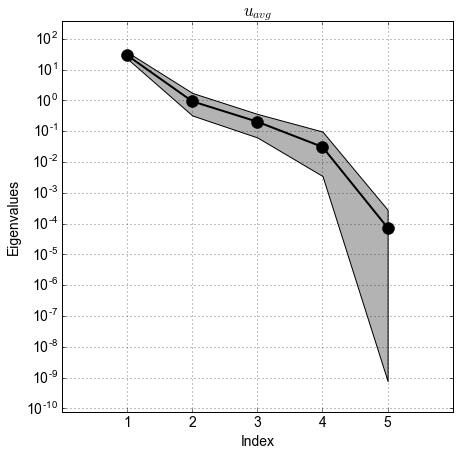

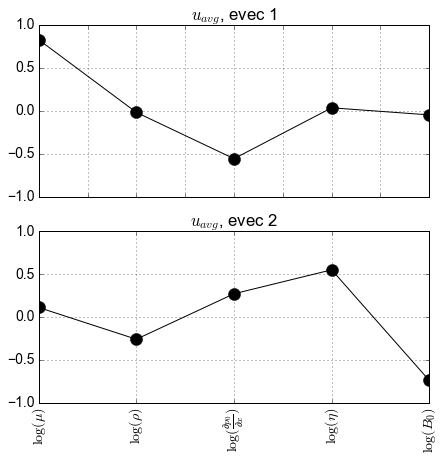

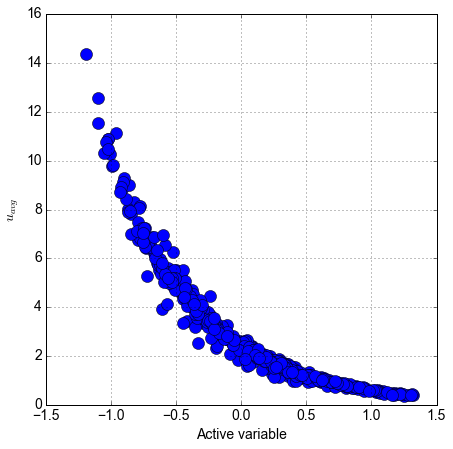

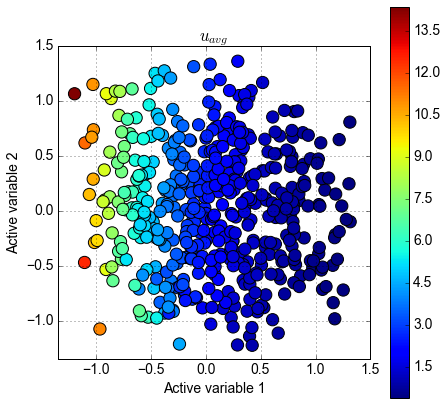

In [9]:
#eigenvalue/vector and summary plots for u_avg
ac.utils.plotters.eigenvalues(ssu.eigenvals, ssu.e_br, out_labels[0])
ac.utils.plotters.eigenvectors(ssu.W1, in_labels=in_labels, out_label=out_labels[0])
ac.utils.plotters.sufficient_summary(XXu.dot(ssu.W1), u, out_label=out_labels[0])

We can see an order-of-magnitude drop between the first and second eigenvalues and a tight 1-dimensional trend in the summary plot that we might expect based on this decay. However, the rest of the decay is not as pronounced as with the Hartmann problem; we see the most significant decay between the fourth and fifth values, indicating that it would take the full 4-dimensional subspace predicted by the analysis above to fully characterize output, though the trends in the summary plots are tight. The eigenvectors indicate that the most important variables are viscosity and pressure gradient, which are also the most important parameters for the Hartmann problem.

We'll now show plots for $B_{ind}$.

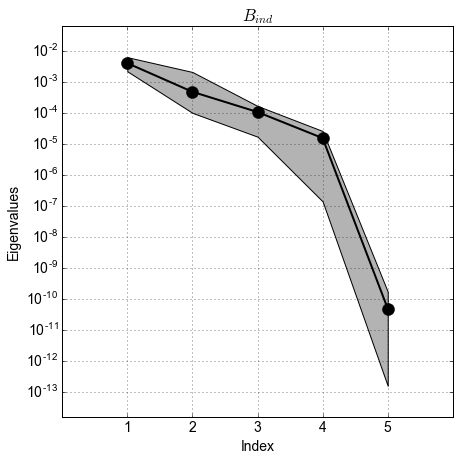

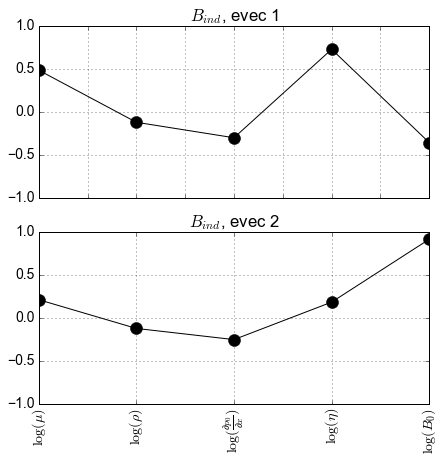

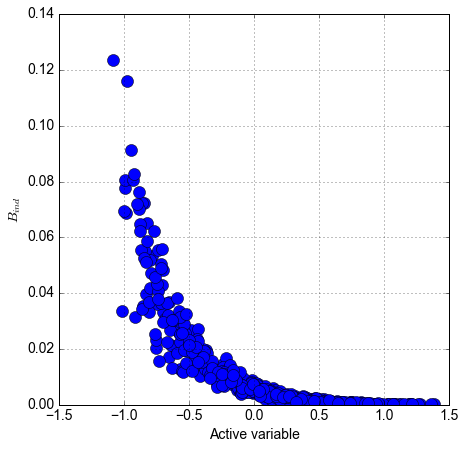

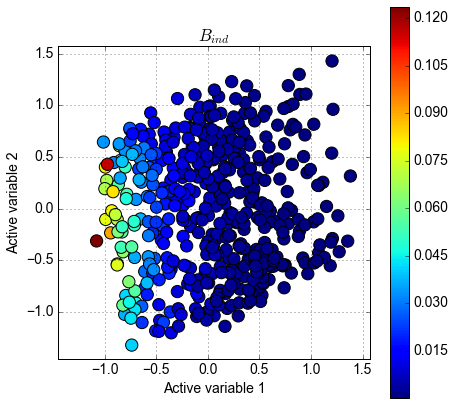

In [10]:
#plots for B_ind
ac.utils.plotters.eigenvalues(ssB.eigenvals, ssB.e_br, out_labels[1])
ac.utils.plotters.eigenvectors(ssB.W1, in_labels=in_labels, out_label=out_labels[1])
ac.utils.plotters.sufficient_summary(XXB.dot(ssB.W1), B, out_label=out_labels[1])

Again, our observations are similar to those of $u_{avg}$; the eigenvalue decay is not as pronounced as with the Hartmann problem and the trends in each summary plot are tight, but imperfect. There is some notable deviation from the trend in the 1-dimensional summary plot when the first active variable is negative; a modeller might consider using a higher-dimensional subspace for approximation in this domain.

### Conclusions

These examples show that the conclusions of the active subspace method are consistent with traditional dimensional analysis. Additionally, there is general consistency between the Hartmann and generator models regarding which parameters are important in characterizing output (viscosity and pressure gradient for $u_{avg}$ and all parameters except $\rho$ for $B_{ind}$). The active subspace method could be applied in the future to help quantify uncertainty by enabling low-dimensional approximations of output that allow for parameter studies otherwise infeasible in high dimensions.